<h3> Session 10 </h4>

<I>

### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.optim.lr_scheduler import MultiStepLR


import sys
sys.path.append('../')

# Loading classes from py files
from model import Net
from utils import Utility
from constants import *
from dataset import *
from transforms import *
from train import train, test, plot_loss_accuracy, plot_misclassified
from misclassified import *
#!pip install torch_lr_finder
from torch_lr_finder import LRFinder


Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

##### Check device support CPU/GPU <hr>

In [3]:
device = Utility.set_cuda_if_available()

print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000001EB261C4310>
Device available for the script - cuda


##### Create Batch loader for train/test dataset  <hr>

In [4]:
get_data = Dataset(batch_size=128)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

e:\Softwares\Apps\Anaconda\envs\era\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([128, 3, 32, 32])
Total images in the batch - 128


##### View sample images from the train loader  <hr>



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


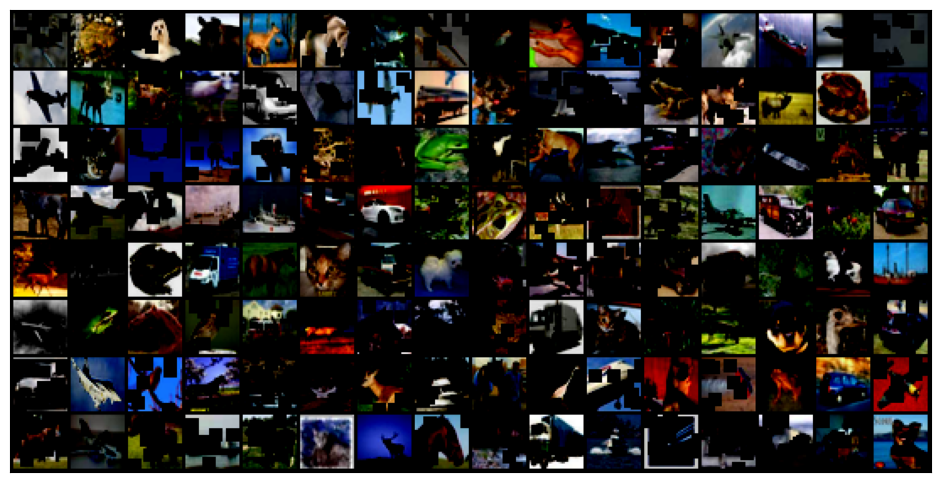

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#get_utilitites.plot_grid(train_loader)
get_utilitites.show_batch(train_loader)

##### CNN Model summary  <hr>


In [5]:
model = Net(normalization='bn').to(device)

summary(model, input_size=(3, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,728
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
           Dropout-4           [-1, 64, 28, 28]               0
            Conv2d-5          [-1, 128, 28, 28]          73,728
         MaxPool2d-6          [-1, 128, 14, 14]               0
       BatchNorm2d-7          [-1, 128, 14, 14]             256
              ReLU-8          [-1, 128, 14, 14]               0
           Dropout-9          [-1, 128, 14, 14]               0
           Conv2d-10           [-1, 64, 14, 14]          73,728
      BatchNorm2d-11           [-1, 64, 14, 14]             128
             ReLU-12           [-1, 64, 14, 14]               0
          Dropout-13           [-1, 64, 14, 14]               0
           Conv2d-14          [-1, 128,

#### Let's Train and test our model
---


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-03


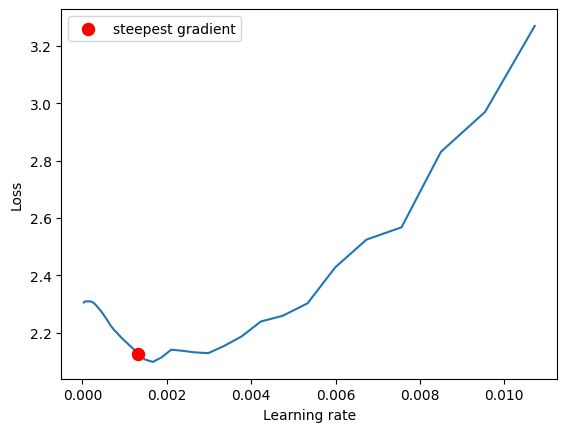

In [24]:
# LR FINDER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-3)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=1, num_iter=100, step_mode="exp")
lr_finder.plot(log_lr=False)
lr_finder.reset()

In [6]:
# variable for model and training
num_epochs = 15
optimizer = optim.Adam(model.parameters(), lr=1.32E-03, weight_decay=0.001)

#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[8,12], gamma=0.1)


for epoch in range(1, num_epochs+1):
  
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Epoch 1


  0%|          | 0/391 [00:06<?, ?it/s]


Test set: Average loss: 1.0193, Accuracy: 6251/10000 (62.51%)

Epoch 2


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.8087, Accuracy: 7176/10000 (71.76%)

Epoch 3


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.7539, Accuracy: 7454/10000 (74.54%)

Epoch 4


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.5687, Accuracy: 8110/10000 (81.10%)

Epoch 5


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.6389, Accuracy: 7889/10000 (78.89%)

Epoch 6


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.8245, Accuracy: 7358/10000 (73.58%)

Epoch 7


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.5592, Accuracy: 8066/10000 (80.66%)

Epoch 8


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.5066, Accuracy: 8277/10000 (82.77%)

Epoch 9


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.3504, Accuracy: 8822/10000 (88.22%)

Epoch 10


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.3275, Accuracy: 8909/10000 (89.09%)

Epoch 11


  0%|          | 0/391 [00:06<?, ?it/s]


Test set: Average loss: 0.3136, Accuracy: 8941/10000 (89.41%)

Epoch 12


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.3159, Accuracy: 8908/10000 (89.08%)

Epoch 13


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.2939, Accuracy: 9019/10000 (90.19%)

Epoch 14


  0%|          | 0/391 [00:05<?, ?it/s]


Test set: Average loss: 0.2892, Accuracy: 9056/10000 (90.56%)

Epoch 15


  0%|          | 0/391 [00:06<?, ?it/s]


Test set: Average loss: 0.2861, Accuracy: 9072/10000 (90.72%)



Plot the Loss/Accuracy for Train/Test dataset

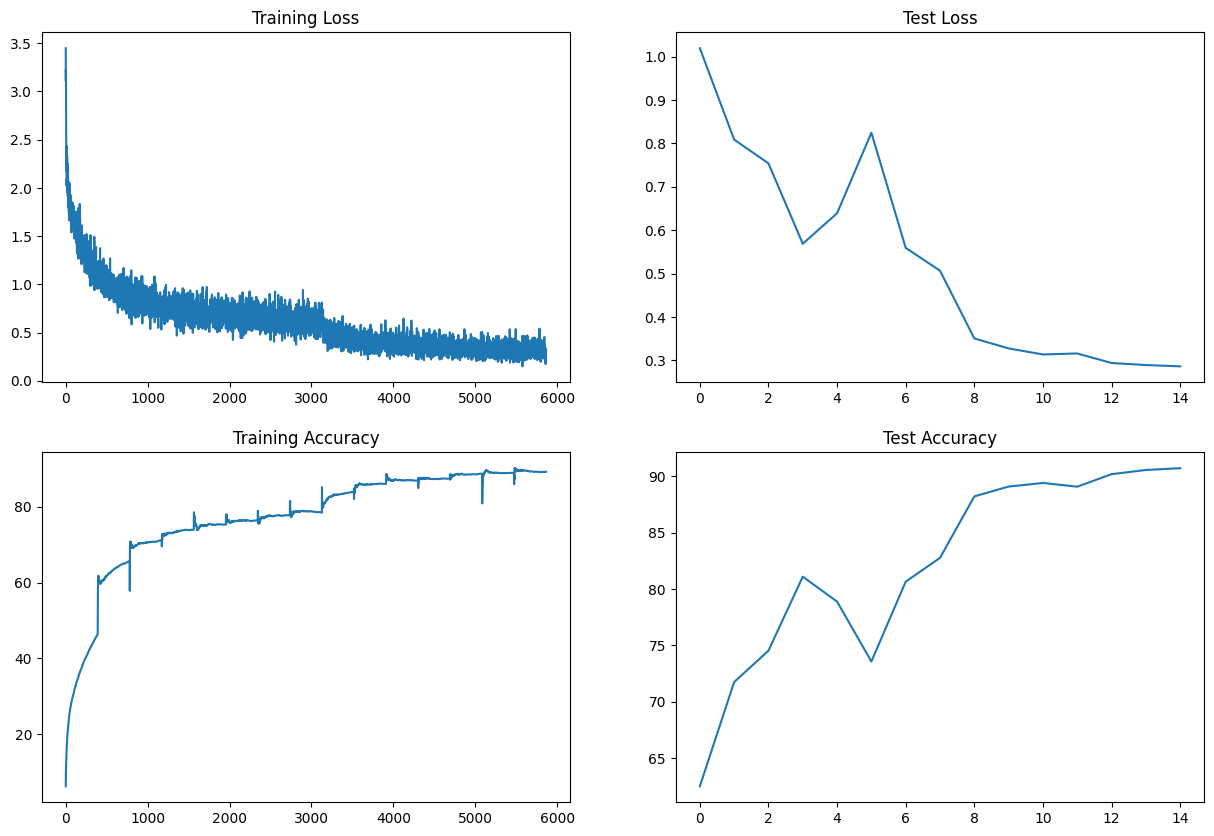

In [7]:
plot_loss_accuracy()

Plot misclassified images

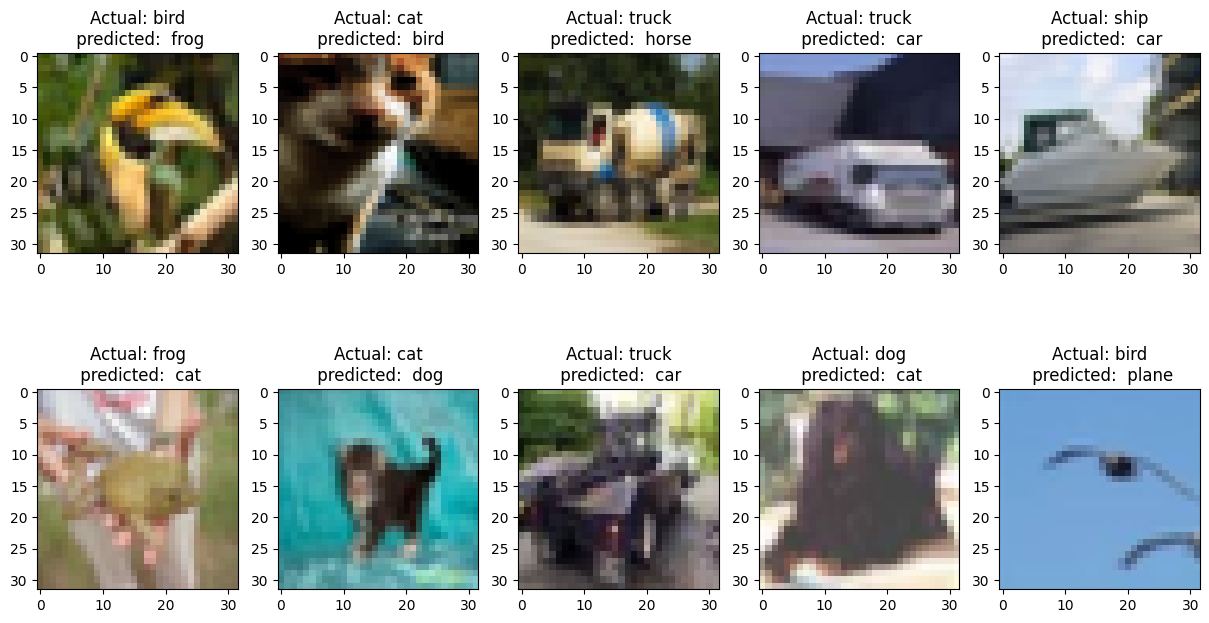

In [10]:
images, actuals, preds = test_misclassified(model,device,test_loader)
plot_images(images, actuals, preds, classes)